# **4.3 Blob detection and description**

## **Intro**
Now, we are going to deal with another type of keypoints. Corners and edges were already covered, so it is time for **blobs**!  

Roughly speaking, a blob is a group of connected pixels in an image in which some properties are constant or approximately constant (e.g. their intensities). All the pixels in a blob can be considered in some sense to be similar to each other. Blobs provide complementary information about regions which is not obtained from edges or corners.

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/blob.png" width="400"/>

<i>Examples of blobs</i>$\\[5pt]$
</center>

The **S**cale-**I**nvariant **F**eature **T**ransform (**SIFT**) is a blob detection and description algorithm whose implementation is far more complex than the Harris detector but easier to use in openCV. In this notebook we will take a look at the main steps involved in the SIFT algorithm and how it can be implemented.

Finally, we will have a look to another blob detector called **SURF**, as an alternative to the SIFT method.

**This notebook contains <font color=green>2 assignments</font> and <font color=blue>2 discussions</font>**

## **Problem context - Image stitching**

In the first notebook of this chapter the Harris corner detector and NCC were proposed to find correspondences between images in the scope of an image stitching system. However, matching keypoints through NCC is not so reliable since it is not **invariant** against typical transformations between images such as **rotation**, **scale** or change in the **point of view**. In these cases, it is really hard or even impossible to find matches between the transformed images. Besides, it has not mechanisms to differentiate points in repetitive elements (e.g. windows in a skyscraper):$\\[10pt]$

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/ncc_problem.jpg" width="322" align="left"/><img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/skyscraper.jpg" width="300" align="rigth"/>$\\[0.5pt]$

<i>Some examples where the combination of the Harris detector and NCC could hardly match keypoints.</i></center>

Aiming to face these issues, in this notebook we will explore the SIFT algorithm.

## **4.3.1 SIFT (Scale-Invariant Feature Transform)**

SIFT was proposed (and patented) by David Lowe in 2004. It finds projections of distinctive 3D points in the image, not necessary corners, and also describes them. This detector and descriptor has invariance to:

- Scale (important difference against Harris).
- Rotation.
- Illumination (partially).
- Affine transformation, a.k.a. point of view, (partially).

Let's start by trying to understand **how the SIFT detector works**!
You can already find how the SIFT works in the course slides, so here is just a summary of the steps:
1. **Octave construction (for scale invariance)**: SIFT progressively blurs the input image by applying a set of Gaussian filters with a growing standard deviation.
2. **Difference of Gaussians (DoG)**: Adjacent blurred images are substracted. This approximates the LoG method in an efficient way.
3. **Find extrema in the DoG pyramid**: Extrema points in the images resulting from the DoG method are blobs in the image and, therefore, keypoint candidates. 
4. **Build the descriptor**: the SIFT keypoint descriptor is computed as the **histogram of orientations** around the extreme point. The mode of the histogram is the main orientation. This histogram is coded as a vector of real values (normally 128D).

The found keypoint is then characterized by:
- Its position in the image,
- the scale where it was found,
- its main orientation,
- and, most importantly, its **descriptor**.

> <font color=orange>Besides the course slides, you can find a detailed description of the algorithm in [here](http://weitz.de/sift/index.html?size=large).</font>



### **Working with SIFT**

As mentioned, the SIFT algorithm is patented, and **it is not included in all versions of  OpenCV**. Fortunately for us, its copyright ended in 2020 and since then it has been re-included in the stantard OpenCV library.

Before that, we had to downgrade the OpenCV version to the last one that included the SIFT, **but this is no longer necessary** and we can now use SIFT without performing any preliminary action.

**<font color=orange>NOTE:</font>**

There is an alternative implementation, called **[pysift](https://github.com/rmislam/PythonSIFT)**: a third party software that implements SIFT like an OpenCV method (only for educational purposes), returning  [`cv2.KeyPoint`](https://docs.opencv.org/3.4/d2/d29/classcv_1_1KeyPoint.html) objects. **We have included this code in the 'utils' folder, in case you want to test it. So, if you choose this option, uncomment the lines in the cell below.**

In [6]:
# Uncomment this if you plan to use pysift
# import sys
# sys.path.append("/gdrive/My Drive/Colab Notebooks/Chapter 4. Keypoint detection/utils")
# import pysift #https://github.com/rmislam/PythonSIFT

Now, let's start to code

In [7]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)

images_path = '/gdrive/My Drive/Colab Notebooks/Chapter 4. Keypoint detection/images/'

#### **<font color="orange">Code pill</font>**
This is how to proceed depending on the implementation you has chosen:

If you use the **OpenCV's method**:
- First, create a SIFT detector with `sift = cv2.xfeatures2d.SIFT_create()`
- Then, call to the method `detectAndCompute(image,mask)`, as explained [here](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) to find keypoints (with descriptors!)
- This function returns a list of `cv2.KeyPoint` objects and one array with shape $\left(n\_keypoints,4\times4\times8\right)$ that corresponds to the 128D descriptor of each keypoint.

If you use **`pysift`**:
- Call to the function `pysift.computeKeypointsAndDescriptors` whose only input is a grey image
- This function also returns a list of `cv2.KeyPoint` objects and one array with shape $\left(n\_keypoints,4\times4\times8\right)$ that corresponds to the 128D descriptor of each keypoint.

### **<font color="green">ASSIGNMENT #1: Extracting SIFT keypoints</font>**

Find SIFT keypoints in the `sift_2.jpeg` image and display the image along with the keypoints.

> <font color="orange">Notes:
- to draw complex keypoints (as those obtained using SIFT), you can use `flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` as a parameter in the `drawKeypoints` method.
- finding SIFT keypoints is a really costly task, so it will take some time to finish.</font>

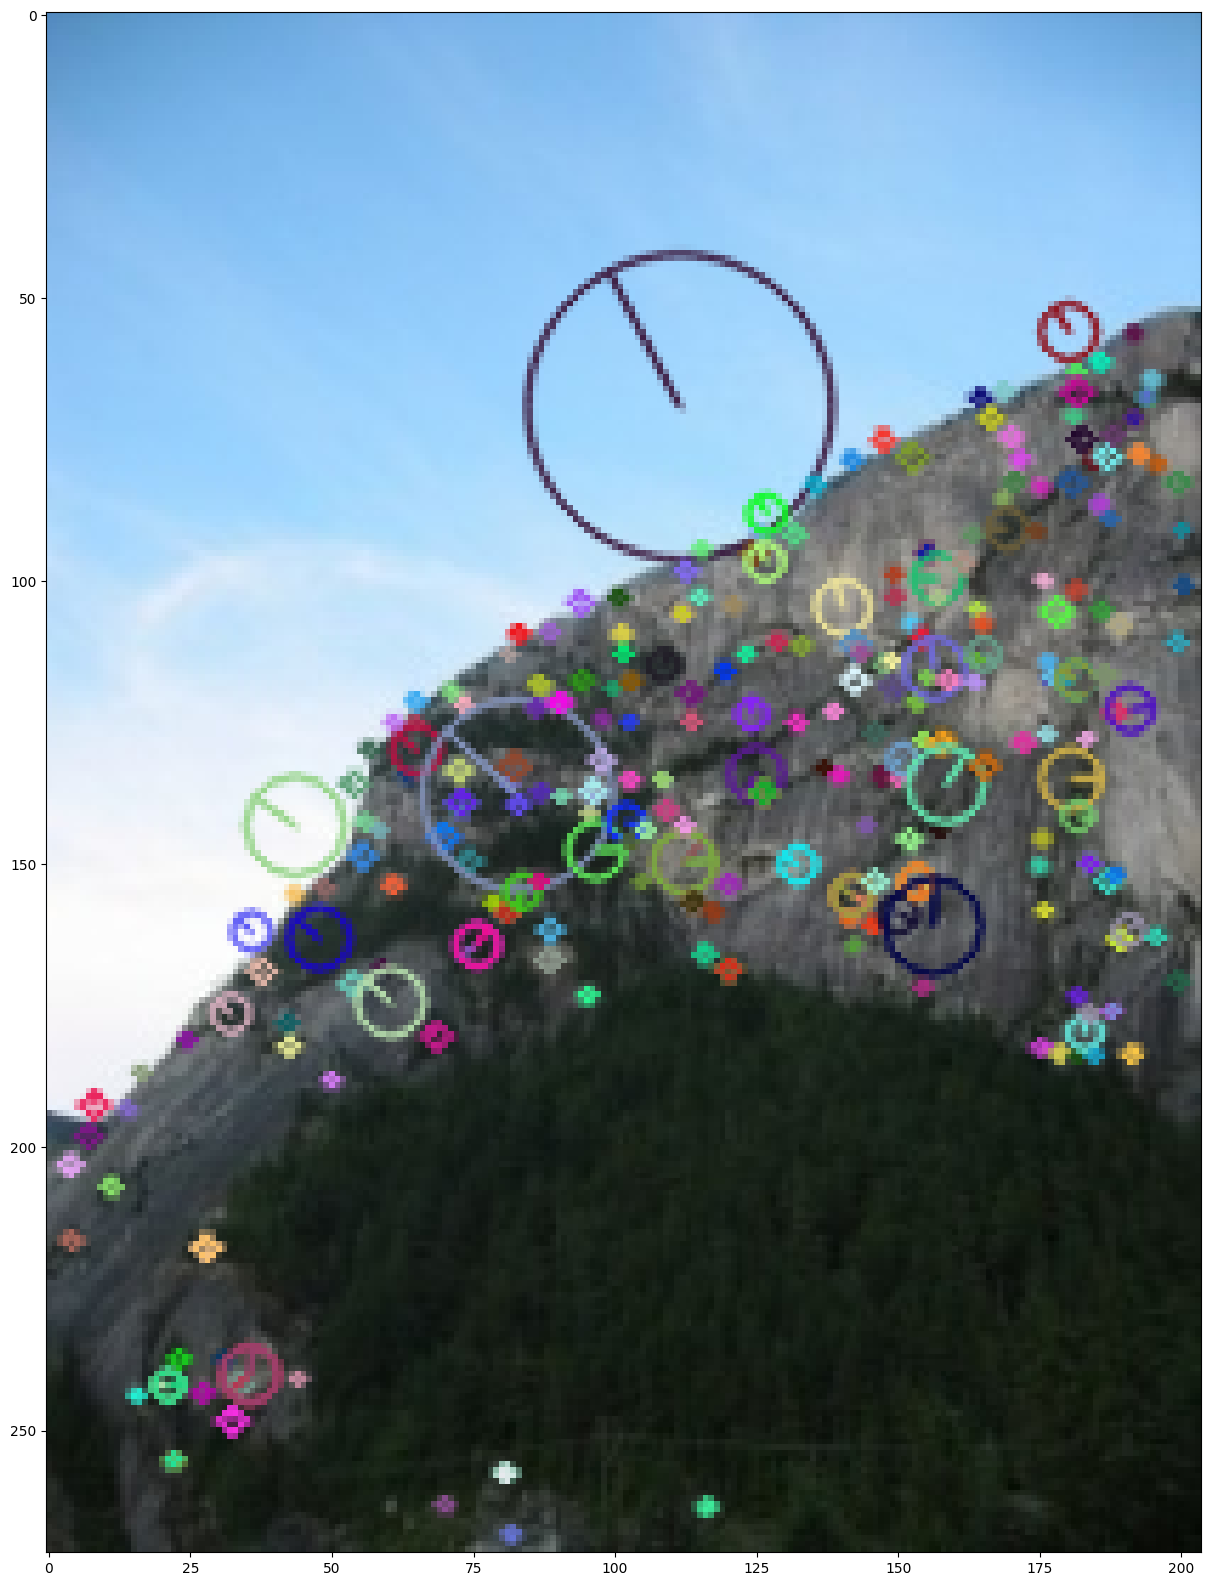

In [9]:
# ASSIGNMENT 1
# - Read 'sift_2.jpeg'
# - Find SIFT keypoints and its descriptors 
# - Display the image using 'flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS'
# - Use the grey image to find the keypoints but show its color version.

# Write your code here!
img=cv2.imread(images_path + 'sift_2.jpeg',1)
img_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_g=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(img_g,None)

img_kp = cv2.drawKeypoints(img_rgb,kp,np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp)

#### **<font color=red><b>Expected output</b></font>**
You should get something like this:

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/sift_example.png" width="300"/>
</center>


### **Matching keypoints**

Now, we are going to match the keypoints in two images of a mountain: `sift_1.jpeg` and `sift_2.jpeg`, which have overlapping fields.$\\[5pt]$

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/mountain_1.jpg" width="300" align="left"/><img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/mountain_2.jpg" width="300" align="rigth"/>$\\[5pt]$
</center>

*For this assignment, the images have been downsampled in order to compute keypoints faster*

**What to do?** Follow the next steps to develop a keypoint matching system using SIFT descriptors.

Similarly to what we did with the Harris method, we are going to do this step by step:

#### **<font color="green">ASSIGNMENT #2a: Retrieving keypoints and descriptors</font>**

First compute the keypoints and their descriptors in each image.

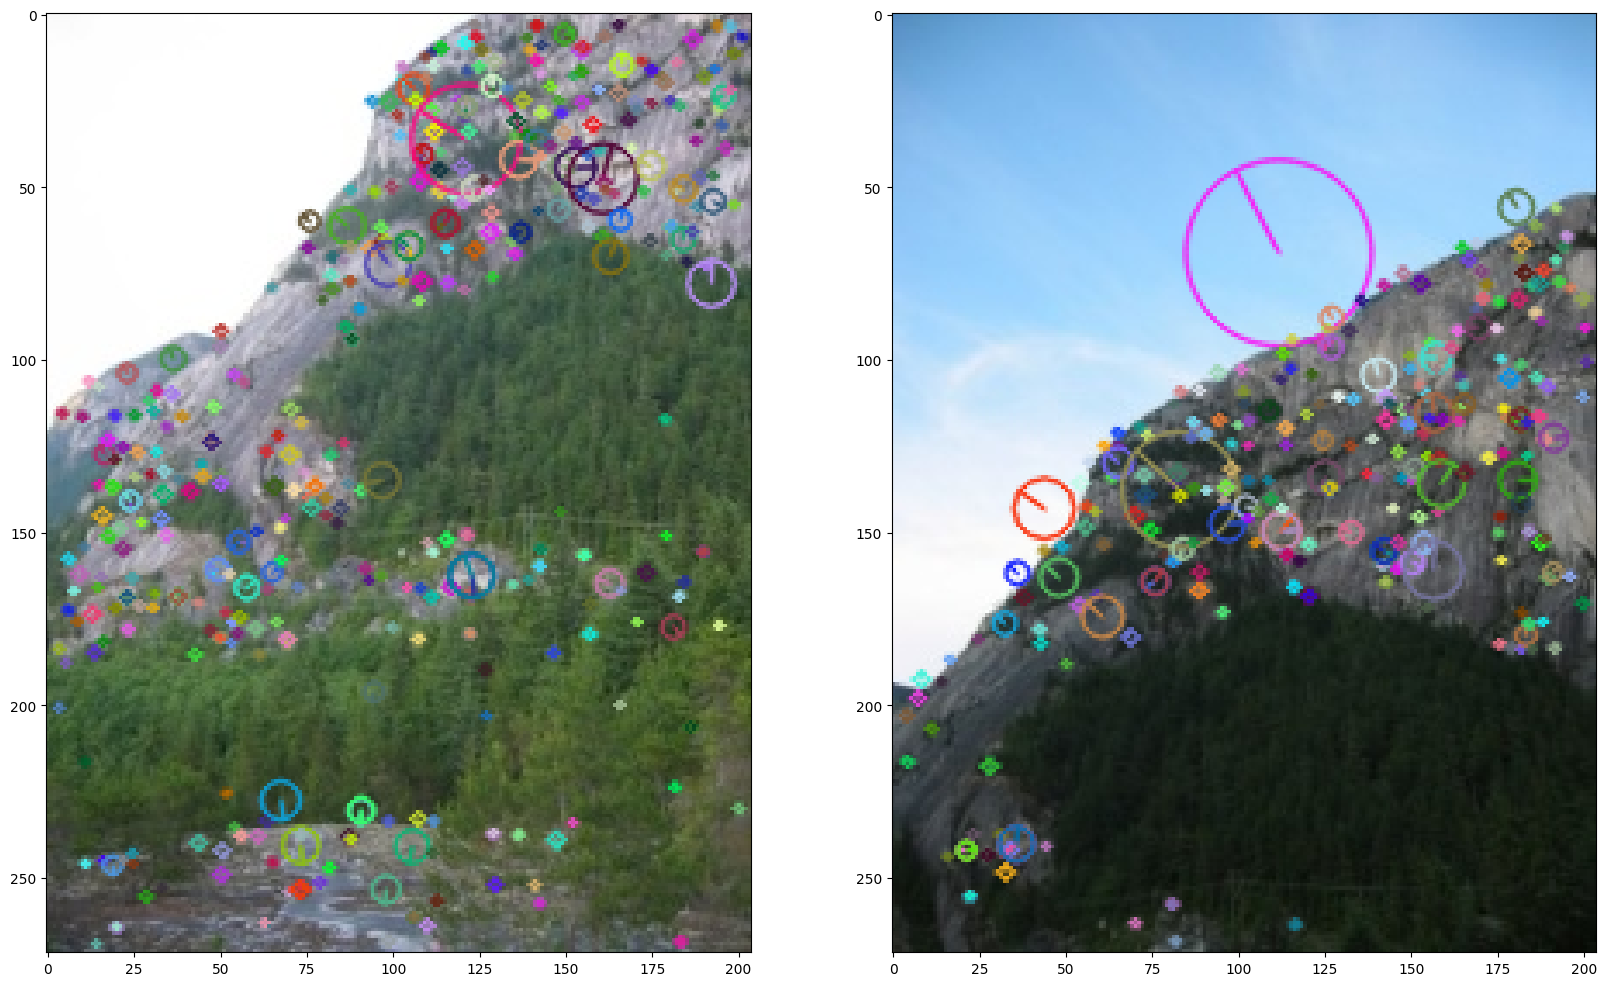

In [15]:
# ASSIGNMENT #2a
# - Read the images 
# - Compute SIFT keypoints

# Write your code here!
img1=cv2.imread(images_path + 'sift_1.jpeg',1)
img2=cv2.imread(images_path + 'sift_2.jpeg',1)
img_rgb1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img_rgb2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_g1=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_g2=cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img_g1,None)
kp2, des2 = sift.detectAndCompute(img_g2,None)

plt.subplot(121)
img_kp1 = cv2.drawKeypoints(img_rgb1,kp1,np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp1)
plt.subplot(122)
img_kp2 = cv2.drawKeypoints(img_rgb2,kp2,np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp2)
plt.show()

#### **<font color="green">ASSIGNMENT #2b: Finding matches</font>**

> <font color="orange">Note: When you match keypoints, you are actually matching their descriptors.</font>

Remember when we used the Brute-Force matcher for the ORB keypoints? Now we are going one step further and use a [`knnMatch`](https://docs.opencv.org/3.4/db/d39/classcv_1_1DescriptorMatcher.html#a378f35c9b1a5dfa4022839a45cdf0e89) ($K$-Nearest Neighbors). This will also return a list of the best $K$ matches but looking for them more *efficiently*. If we use $K=2$ we will get two matches for each keypoint: the two nearests matches. So, we will get a $N \times 2$ list of matches where each row represents a matched keypoint in the left image and the two columns have the information about the match with the right keypoint:

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/sift_matching.png" width="400"/>
</center>

The distance between two descriptors is given at `DMatch.distance`. **If the distance is very low, then the keypoints are quite similar!** This is the case of keypoints 91 and 94 in the figure above.

Use `cv2.BFMatcher().knnMatch()` to obtain the list of matches, then **print the distances with the two closest candidates of the first match**.

In [37]:
# ASSIGNMENT #2b
# - Use 'knnMatch' to find the two best matches for each keypoint
# - Print the distances between the first keypoint in the first image and the two most similar in the second one.

# Write your code here!

matches = cv2.BFMatcher().knnMatch(des1,des2,k=2)
print(round(matches[0][0].distance),round(matches[1][1].distance))

316 411


##### **<font color=red><b>Expected output</b></font>**
$[385.4906005859375,411.6163330078125]$

#### **<font color="green">ASSIGNMENT 2c: Filtering non-robust matches out</font>**

In order to discard incorrect matches, we are going to use the distance value for the two output matches that we have found for each keypoint. Thus, we will only accept matches that hasn't got two close solutions (i.e. with similar distance), because that would mean that, for a certain keypoint in one image, there are two different keypoints that are very similar to it (in terms of descriptor distance). In this situation, it is advisable to discard the match, as a wrong match (usually called **outlier**) can severely affect the robustness of any feature-based computer vision system. 

This is the case of the keypoint 1 in the previous image. There you can see that it has a distance of 17.7 to keypoint 4 and of 21.4 to keypoint 9, and those values are **too close to ensure a correct match**. In this case, it is safer to discard the match. On the contrary, keypoint 91 has a distance of 9.6 to its first match and of 87.5 to keypoint 90, so it can be safely considered a right match. Finally, if the smallest distances to all the keypoints in the other image are too large, no match for that keypoint is set.

This image might help you to understand this:

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/ch43_sift_matching_2.png" width="800"/>
</center>

Now, iterate along the matches list and filter those that does not fulfil the specified condition (define a certain threshold to discard wrong matches).

In [38]:
# ASSIGNMENT #2c
# - Iterate over the matches and select those that seems to be robust matches.

# Write your code here!

robust_matches = []
threshold = 0.75

for i in range(len(matches)):
    if matches[i][0].distance < threshold*matches[i][1].distance:
        robust_matches.append(matches[i][0])
    elif matches[i][1].distance < threshold*matches[i][0].distance:
        robust_matches.append(matches[i][1])

#### **<font color="green">ASSIGNMENT 2d: Displaying the matches</font>**

> <font color=orange>Remember to use `flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`</font>

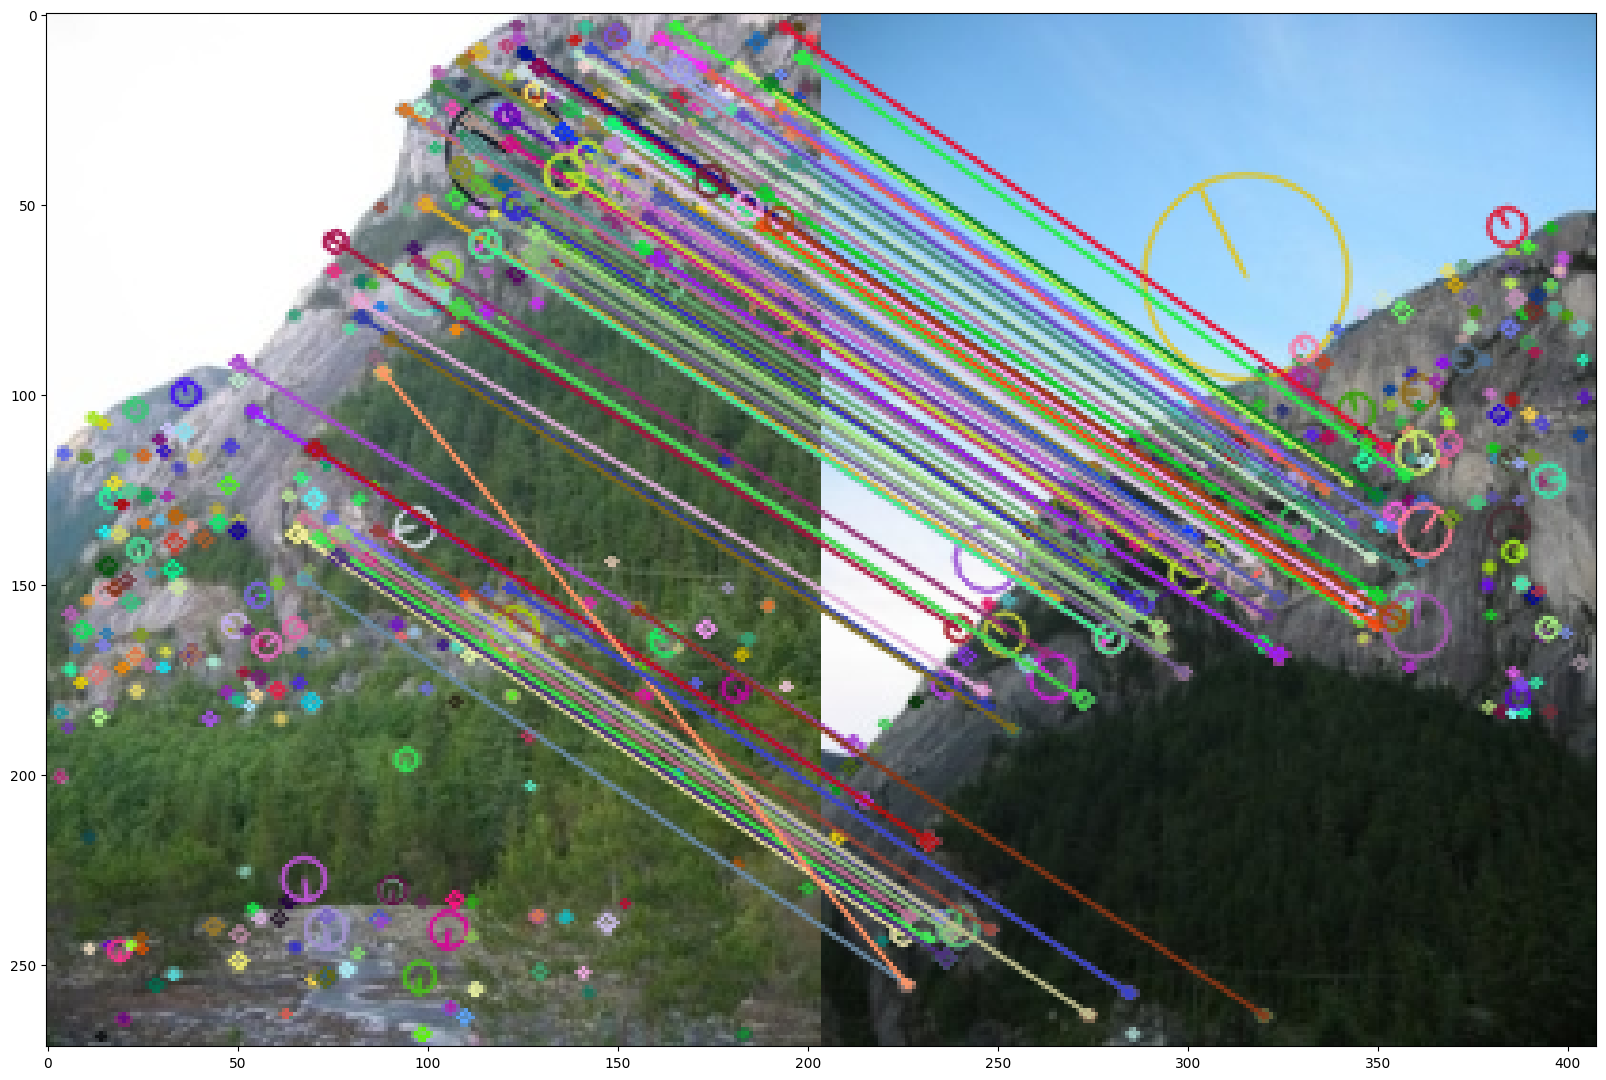

In [40]:
# ASSIGNMENT #2d
# - Display the image and the matches with 'flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS'

# Write your code here!
dimg = cv2.drawMatches(img_rgb1, kp1, img_rgb2, kp2, robust_matches, np.asarray([]), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(dimg)

##### **<font color=red><b>Expected output</b></font>**
You should get something like this:

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/sift_matching_result.png" width="600"/>
</center>

### <font color="blue"><b>Discussion #1</b></font>

**Finally, answer the following questions**

- Looking at the results, could a system stitch both images?  

    <font color=blue><b> Yes, with a large number of matched points, a system has a higher likelihood of successfully stitching both images together. These matched points serve as reference points that help align the images accurately and guide the stitching process to create a cohesive and continuous final image. The more matched points there are, the more reliable the system's ability to stitch the images effectively.</b></font>
 
  
- How do you think it could be done?

    <font color=blue><b>Initially, it is necessary to conduct a histogram matching process to align the image in relation to its color and brightness. Subsequently, utilizing the acquired matches, we would align corresponding points in both images by overlaying one image onto the other. Additionally, we would incorporate the pixels from the second image that are not present in the first image, ultimately producing a panoramic image.</b></font>

## **4.3.2 SURF (Speeded up robust features)**
A couple of years after SIFT was released, once it was considered a *de-facto* standard for keypoint detection and description, another method claimed to be much more efficient and even more robust against some changes in the image than SIFT. It was coined as **S**peeded **U**p **R**obust **F**eatures ([SURF](https://people.ee.ethz.ch/~surf/eccv06.pdf)) and developed in 2006 by Herbert Bay, Tinne Tuytelaars and Luc Van Gool at ETH in Zurich.

The idea behind SURF speed is the use of integral images. In short, an integral image is computed from a normal image by set the value of each pixel as the sum of all pixels above and to the left to it. This integral image allows fast computation of the results of box filters (approximations for the LoG) and Haar wavelets for the descriptor.

If you are interested, you can find a complete explanation for this kind of features in [here](https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html) and [here](https://medium.com/data-breach/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e), for instance. In this notebook we are just using the method that OpenCV provides and inspect its results.



**<font color=orange> NOTE: </font>**

The SURF method is copyrighted and is no longer part of the OpenCV library. There are still some versions of OpenCV that include it as a non-standard library but, unfortunately, **Google Colab does not support those versions**.

Therefore, here we only present example code on how it would be used, as well as the expected result. We have no assignment here other than to read and understand the code, as well as inspect the resulting key points. Then try to respond to the discussion below to see your opinion on the results of the method.

### **Using SURF keypoints**

Just like in the previous exercise, we use now the SURF features to:
- find keypoints and their descriptors in the `sift_1.jpeg` and `sift_2.jpeg` images.
- find robust matches.
- display the resulting image.

The procedure for finding robust matches is the same than for the SIFT features (although the threshold is typically different and should be tuned for different sets of images).

In this code, we have used the [SURF implementation](https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html) within the OpenCV in version 3.4.19. Remember that this code does not work on this Colab Notebook but should work straight away if you use it locally with a proper version of OpenCV.

In [14]:
# Code example for using the SURF method. 
# This code is not working anymore in this Colab Notebook. It is here just for demonstration purposes.

# surf = cv2.xfeatures2d.SURF_create(400)
    
# kps_1, des_1 = surf.detectAndCompute(gray_1,None)
# kps_2, des_2 = surf.detectAndCompute(gray_2,None)

# kps = len(kps_1)+len(kps_2)

# # Call knnMatch
# matches = cv2.BFMatcher().knnMatch(des_1,des_2, k=2)
# good = []
# # For each match
# for m,n in matches:
#     # If first two distances are not close
#     if m.distance < 0.60*n.distance:
#         # It is a good match! Add it to the list
#         good.append(m)

# # Display both images side-by-side along with the matches
# matches_image = np.copy(image_1)
# matches_image = cv2.drawMatches(image_1,kps_1,image_2,kps_2,good,matches_image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(matches_image)

##### **<font color=red><b>Expected output</b></font>**
This is the result of the previous code:

<center>
<img src="https://raw.githubusercontent.com/famoreno/cv_jn_images/master/ch4/insert/ch43_a3_result.png" width="600"/>

SURF matching result with a Hessian threshold of 400 (check the SURF extractor [documentation](https://docs.opencv.org/3.4/d5/df7/classcv_1_1xfeatures2d_1_1SURF.html))
</center>



### <font color="blue"><b>Discussion #2</b></font>

**Finally, answer the following questions**

- SURF was designed in the early 2000s to be used as a fast alternative to SIFT. Do you think it is still worth using SURF instead of SIFT?

    <font color=blue><b>Your answer here!</b></font>
  
- With respect to the SIFT extracted features, do you think that the SURF ones are *similar*, *better* or *worse*?

    <font color=blue><b>Your answer here!</b></font>

## **Conclusion**

This notebook has presented one of the most famous keypoint detector and descriptor and you have been able to play a little bit with it. SIFT is one of the **best algorithms for feature description** and it is robust against changes in light conditions, scale, rotation and partially to changes in viewpoint. Therefore, in an artificial perception course, learning how it was acomplished and how it works is mandatory. 

Finally, we have presented an alternative to SIFT called SURF, which operates similarly by working with integral images and relying on efficient approximations of some of the SIFT steps.

### **Extra**

If you want to learn more about SIFT, you can look through the [original paper](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&ved=2ahUKEwi7y_G-xrDoAhUGHcAKHWn1DIsQFjAAegQIBRAB&url=https%3A%2F%2Fwww.cs.ubc.ca%2F~lowe%2Fpapers%2Fijcv04.pdf&usg=AOvVaw0cBGKtFZfTh8Vf_Y4kP3LS) by David Lowe. It was proposed in 1999 and published in 2004.

The SURF original paper can be found [here](https://people.ee.ethz.ch/~surf/eccv06.pdf).